<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week10/Day1/DailyChallenge_Week10Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving US Cars Dataset.zip to US Cars Dataset.zip


In [4]:
import zipfile
import os

with zipfile.ZipFile("US Cars Dataset.zip", "r") as zip_ref:
    zip_ref.extractall("car_data")

print(os.listdir("car_data"))

['USA_cars_datasets.csv']


In [5]:
import pandas as pd

df = pd.read_csv("car_data/USA_cars_datasets.csv")
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


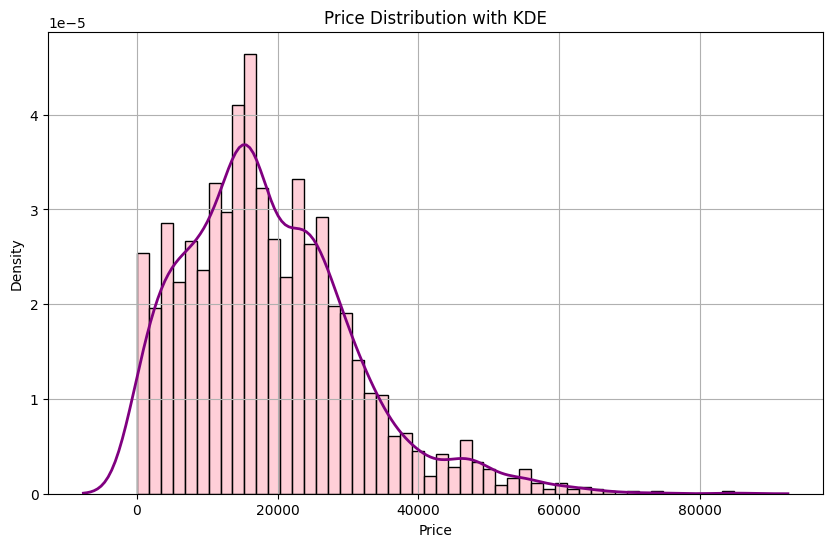

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(df["price"], bins=50, color='pink', stat='density', edgecolor='black')

sns.kdeplot(df["price"], color='purple', linewidth=2)

plt.title("Price Distribution with KDE")
plt.xlabel("Price")
plt.ylabel("Density")
plt.grid(True)
plt.show()

<ipython-input-23-85aa9a9a875f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_brand_df, x='brand', y='price', palette='Set3')


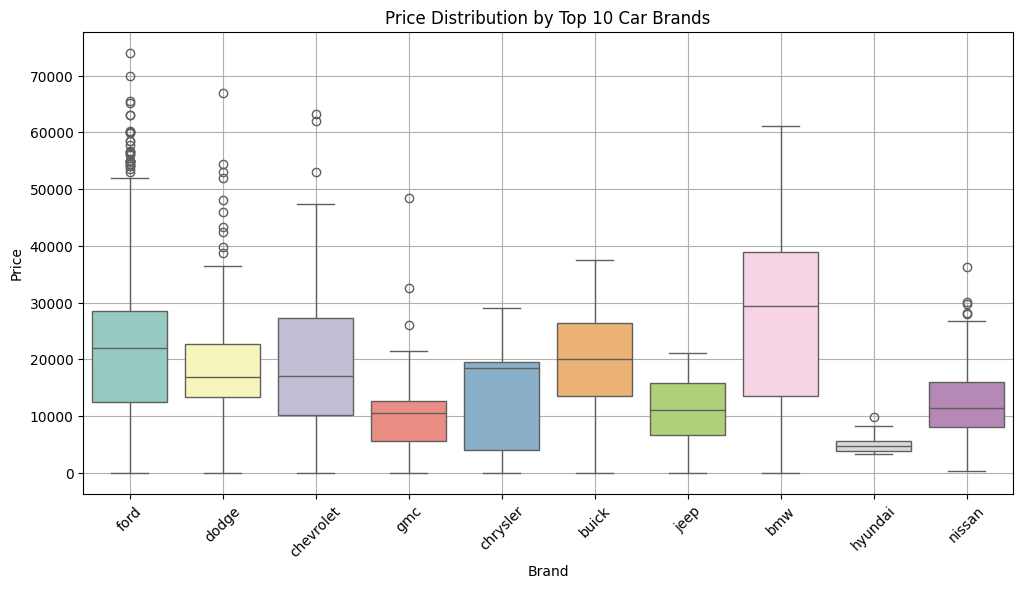

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 brands
top_brands = df['brand'].value_counts().nlargest(10).index

# Filter the DataFrame
top_brand_df = df[df['brand'].isin(top_brands)]

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_brand_df, x='brand', y='price', palette='Set3')
plt.title('Price Distribution by Top 10 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [32]:
import plotly.express as px

fig = px.scatter(
    df,
    x='mileage',
    y='price',
    color='condition',
    hover_data=['brand', 'model', 'year'],
    title='Price vs. Mileage by Condition',
    labels={'mileage': 'Mileage', 'price': 'Price'},
    template='plotly_white',
    opacity=0.6
)

fig.show()

In [33]:
import plotly.express as px

top_conditions = df['condition'].value_counts().nlargest(5).index
filtered_df = df[df['condition'].isin(top_conditions)]

fig = px.scatter(
    filtered_df,
    x='mileage',
    y='price',
    color='condition',
    size='price',
    size_max=10,
    opacity=0.6,
    hover_data=['brand', 'model', 'year', 'state'],
    title='Price vs. Mileage by Condition (Top 5 Conditions)',
    color_discrete_sequence=px.colors.qualitative.Bold,
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Mileage (miles)',
    yaxis_title='Price ($)',
    title_font_size=18
)

fig.show()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.groupby(['brand', 'condition'])['price'].mean().reset_index()
pivot_table = heatmap_data.pivot(index='brand', columns='condition', values='price')

In [35]:
# 10 brands by count
top_brands = df['brand'].value_counts().nlargest(10).index

# Filter pivot to only top brands
pivot_table = pivot_table.loc[pivot_table.index.isin(top_brands)]

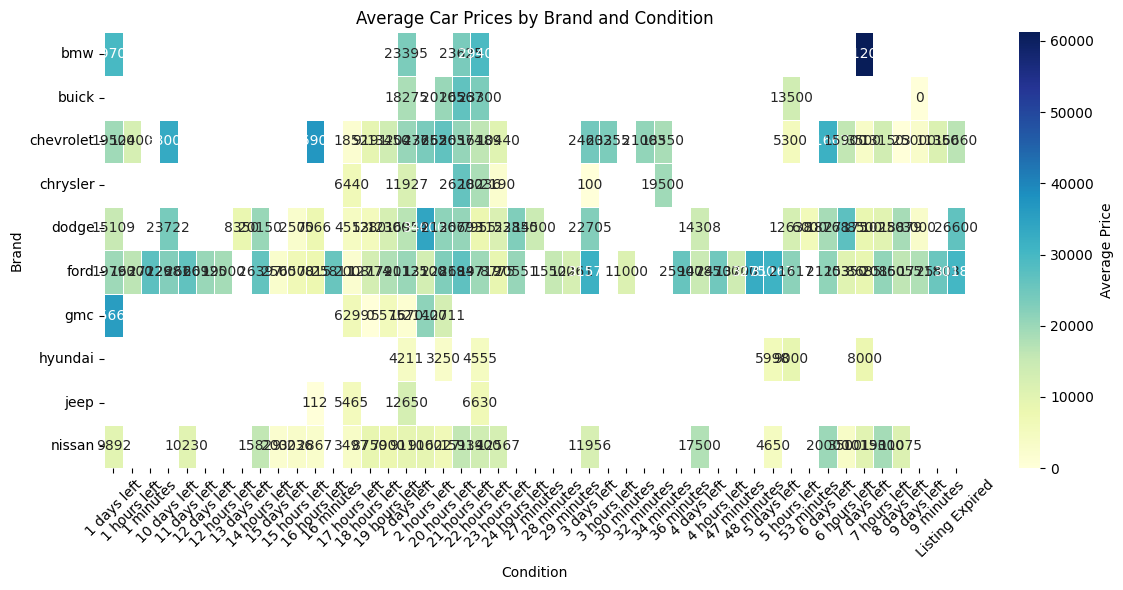

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Average Price'})
plt.title("Average Car Prices by Brand and Condition")
plt.xlabel("Condition")
plt.ylabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
def simplify_condition(value):
    if "expired" in value.lower():
        return "Expired"
    elif "minutes" in value.lower():
        return "<1 Hour"
    elif "hours" in value.lower():
        hours = int(value.split()[0])
        return "<1 Day" if hours < 24 else ">1 Day"
    elif "days" in value.lower():
        return ">1 Day"
    return "Other"

df["condition_clean"] = df["condition"].apply(simplify_condition)

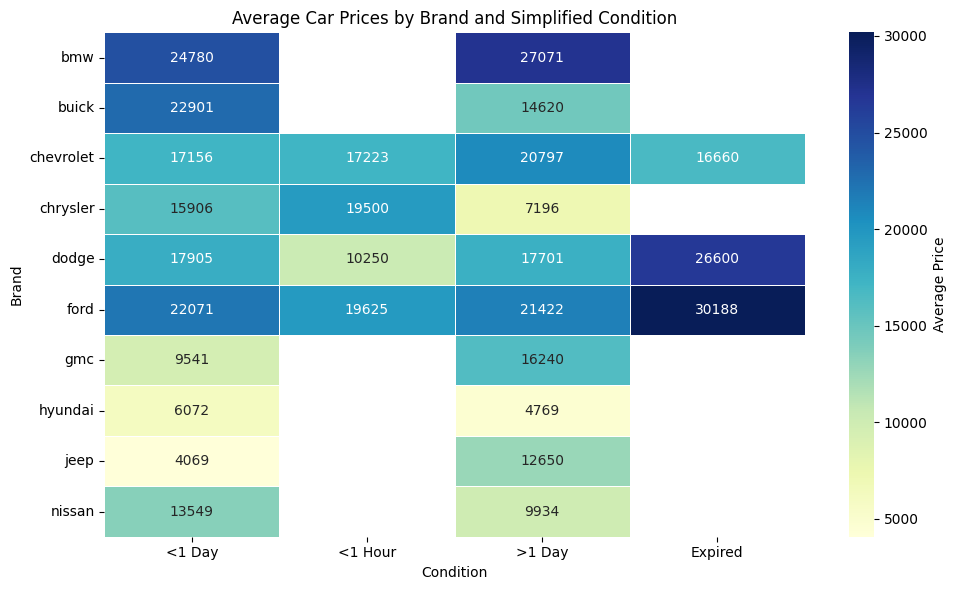

In [38]:
avg_prices = df.groupby(["brand", "condition_clean"])["price"].mean().reset_index()
pivot_table = avg_prices.pivot(index="brand", columns="condition_clean", values="price")

top_brands = df['brand'].value_counts().nlargest(10).index
pivot_table = pivot_table.loc[pivot_table.index.isin(top_brands)]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Average Price'})
plt.title("Average Car Prices by Brand and Simplified Condition")
plt.xlabel("Condition")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

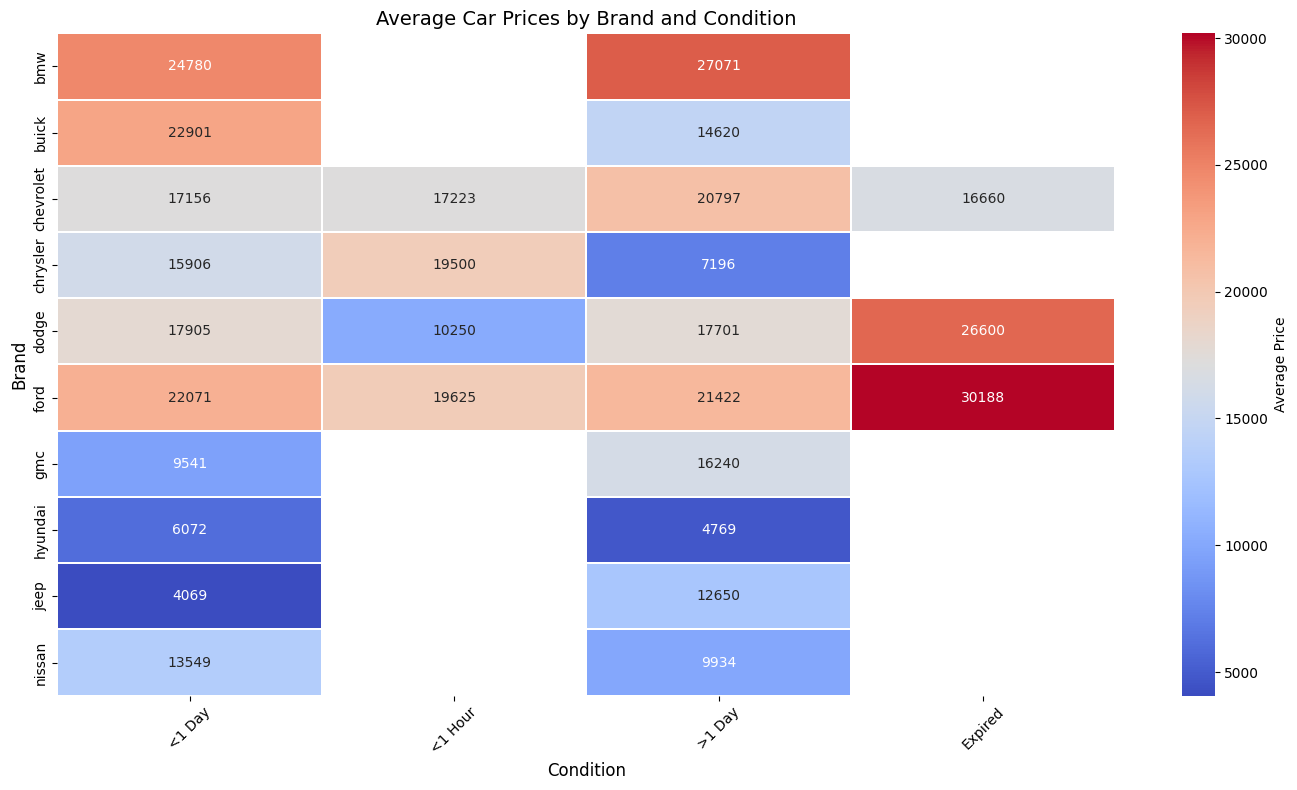

In [40]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    linewidths=0.3,
    cbar_kws={'label': 'Average Price'}
)
plt.title("Average Car Prices by Brand and Condition", fontsize=14)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
import plotly.express as px

fig = px.imshow(
    pivot_table,
    text_auto=True,
    color_continuous_scale="Viridis",
    labels=dict(x="Condition", y="Brand", color="Average Price"),
    aspect="auto",
    title="Interactive Heatmap: Average Car Prices"
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()